## SI 670 Applied Machine Learning, Week 3: Cross Validation, Logistic Regression and Evaluation (Due Wednesday Sept 21, 2022 11:59pm)

For this assignment, you will be exercising on questions related to Logistic regression, Dummy classifiers, and cross-validation.

* This homework is worth 100 points in total. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f22-hw3-youruniqname.ipynb`

* Any file submitted after the deadline will be marked as late. Please consult the syllabus regarding late submission policies. You can submit the homework as many time as you want, but only your latest submission will be graded.

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



### Question 1 (20 points)

This question asks you to explore the relationship between the distribution of cross-validation scores vs the data size. 

Please use a 'for' loop to repeat the following steps with `n` varying from `[100, 500, 1000, 5000, 10000]`:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=n, n_features=7, random_state=0`;
2. Create a `LinearRegression` model
3. Apply `cross_val_score` to the model and generated data and use three-fold cross-validation.
4. Calculate the mean and std of the returned `cv_scores` across the 3 cross-validation folds.

Store the mean and std of the `cv_scores` in lists `cv_scores_mean` and `cv_scores_std` respectively. Do you see the std increasing or decreasing? And why? 

*This function should return a tuple of two lists `(cv_scores_mean, cv_scores_std)`, where both of them should have length 5.*


In [2]:
def answer_one():
    import numpy as np
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    
    cv_scores_mean = []
    cv_scores_std = []
  
    for n in [100, 500, 1000, 5000, 10000]:
        X_F1, y_F1 = make_friedman1(n_samples=n, n_features=7, random_state=0)
        linreg = LinearRegression()
        cv_scores= cross_val_score(linreg, X_F1, y_F1, cv=3)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
    
    return (cv_scores_mean, cv_scores_std)

answer_one()

([0.6018299574452851,
  0.6992854711790496,
  0.7581670531880474,
  0.7601055644422732,
  0.7630386688459642],
 [0.12627903848248154,
  0.0244238445664555,
  0.032066624338011815,
  0.008641386533462707,
  0.007846567081112229])

Now, you will train a logistic regression classifier models and evaluate how effectively it  predicts instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Then you'll perform a grid search to find optimal parameters. 
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
# # run this cell if you are using Colab

# !rm -rf fraud_data.csv

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fraud_data.csv': io.BytesIO(uploaded['fraud_data.csv'])}

# # upload 'fraud_data.csv'

In [4]:
# run this cell if you are using Jupyter
files = {'fraud_data.csv': 'fraud_data.csv'}

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

df = pd.read_csv(files['fraud_data.csv'])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2 (20 points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

Then train a LogisticRegression classifier with C=1. What is the accuracy? What is the recall?

*This function should a return a tuple with four floats, i.e. `(dummy_accuracy, dummy_recall, lr_accuracy, lr_recall)`.*

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_fscore_support
    
    dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
#     dummy_clf.fit(X_train, y_train)
    dummy_y_pred  = dummy_clf.predict(X_test)
    dummy_accuracy = dummy_clf.score(X_test,y_test)
    dummy_metrics = precision_recall_fscore_support(y_test, dummy_y_pred, pos_label = 1,average ='binary')
    dummy_recall = dummy_metrics[1]
    
    logreg = LogisticRegression().fit(X_train, y_train)
    lr_accuracy = logreg.score(X_test,y_test)
    lr_y_pred  = logreg.predict(X_test)
    lr_metrics = precision_recall_fscore_support(y_test, lr_y_pred, pos_label = 1, average ='binary')
    lr_recall = lr_metrics[1]
    
    return dummy_accuracy, dummy_recall, lr_accuracy, lr_recall

answer_two()

(0.9852507374631269, 0.0, 0.9959439528023599, 0.7875)

### Question 3 (20 points)

Fit the LogisticRegression with `C` varying from `[[0.1, 1, 10]` and report the accuracy, precision, recall, and F1 scores for each choice of `C`.

*This function should a return a tuple with four lists, i.e. `(accuracy_list, precision_list, recall_list, f1_list)`, and each list should contain 3 numbers, one per choice of C*

In [9]:
def answer_three():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_fscore_support
    
    accuracy_list =[] 
    precision_list = [] 
    recall_list =[] 
    f1_list =[]
    
    for c in [0.1, 1, 10]:
        logreg = LogisticRegression(C=c).fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        accuracy = logreg.score(X_test, y_test)
        precision, recall, f1_score, temp = precision_recall_fscore_support(y_test, y_pred, average ='binary')
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1_score)

    return accuracy_list, precision_list, recall_list, f1_list

answer_three()

([0.9964970501474927, 0.9959439528023599, 0.9963126843657817],
 [0.9692307692307692, 0.9264705882352942, 0.9545454545454546],
 [0.7875, 0.7875, 0.7875],
 [0.8689655172413793, 0.8513513513513514, 0.8630136986301369])

### Question 4 (20 points)

Train a logistic regression classifier with `C=10` using X_train and y_train.

For the logistic regression classifier, create (1) a precision-recall curve and (2) an ROC curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall_at_p75, tpr_at_fpr16)`.*
*You should also include code that uses the scikit-learn (sklearn.metrics) functions precision_recall_curve and roc_curve to generate the precision/recall and ROC curves above*

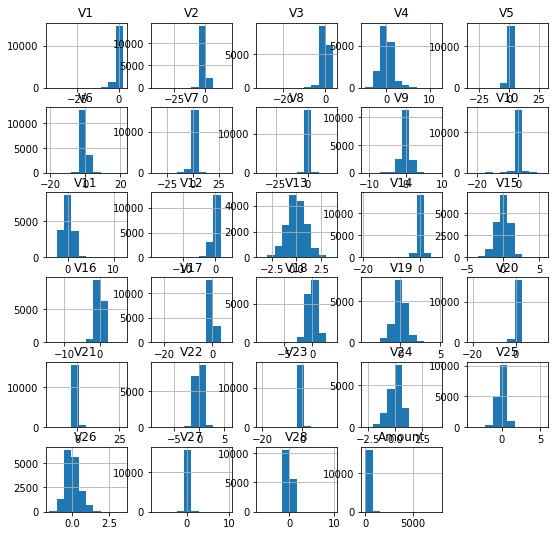

In [10]:
X_train.hist(figsize=(9,9));

I will use MinMax Scaler because not all the features have a normal distribution.

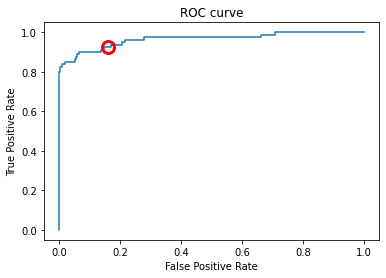

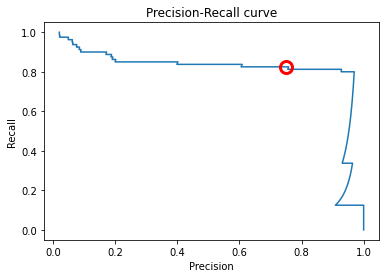

(0.825, 0.925)

In [12]:
def answer_four():
    from sklearn.linear_model import LogisticRegression  
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import precision_recall_curve, roc_curve
    
    mm_scaler = MinMaxScaler()
    X_train_scaled = mm_scaler.fit_transform(X_train)
    logreg = LogisticRegression(C=10).fit(X_train_scaled, y_train)
    X_test_scaled = mm_scaler.transform(X_test)
    y_pred = logreg.decision_function(X_test_scaled)

    #create ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    tpr_at_fpr16 = np.interp(0.16, fpr ,tpr)

    plt.plot(fpr,tpr,label="ROC curve")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.plot(0.16, tpr_at_fpr16, 'ro', markersize=12, fillstyle='none', mew=3)
    plt.title("ROC curve")
    plt.show()

    #create precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    recall_at_p75 = np.interp(0.75, precision, recall)
    
    plt.plot(precision, recall, label="Precision-Recall curve")
    plt.ylabel('Recall')
    plt.xlabel('Precision')
    plt.plot(0.75, recall_at_p75, 'ro', markersize=12, fillstyle='none', mew=3)
    plt.title("Precision-Recall curve")
    plt.show();


    return recall_at_p75, tpr_at_fpr16

answer_four()

### Question 5 (20 Points)

Suppose you have trained a classifier distinguishing Benign vs Malignant cancers. And the confusion matrix of your classifier is given below.

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    10000	|   100 	|
| Actual: Malignant  	|    200	|   10 	|

### Question 5 (a) (10 points) 
If we assume Benign is the positive class and Malignant is the negative class, what are the precision and recall for Benign? If we assume Malignant is the positive class and Benign is the negative class, what are the precision and recall for Malignant?

*This function should return a tuple of four float numbers: `(precision_benign, recall_benign, precision_malignant, recall_malignant)`. You can calculate these scores either by coding, or by hand using the correct formulas for precision and recall.*

In [13]:
def answer_five_a(TP, TN, FP, FN):
    
    precision_benign = TP/ (TP+FP)
    recall_benign = TP / (TP+FN)
    
    precision_malignant = TN/ (TN+FN)
    recall_malignant = TN / (TN+FP)
    
    return precision_benign, recall_benign, precision_malignant, recall_malignant

answer_five_a(TP = 10000, TN = 10, FP = 200, FN = 100)

(0.9803921568627451,
 0.9900990099009901,
 0.09090909090909091,
 0.047619047619047616)

### Question 5 (b) (10 points) 
If you have another classifier with the following confusion matrix, which classifier do you prefer and why? (Hint: calculate the precision and recall scores for this classifier and compare with the previous classifier, considering what the relative costs are for each type of mistake.)

|      	| Predicted: Benign 	| Predicted: Malignant 	|
|:----:	|----	|----	|
| Actual: Benign 	|    7000	|   3100 	|
| Actual: Malignant  	|    30	|   180 	|

In [14]:
p_benign, r_benign, p_malignant, r_malignant = answer_five_a(TP = 7000, TN = 180, FP = 30, FN = 3100)
p_benign, r_benign, p_malignant, r_malignant

(0.9957325746799431,
 0.693069306930693,
 0.054878048780487805,
 0.8571428571428571)

#### Answer to question 4 (b)

Write your answer here.

We want to not miss out on any possible cancer, so false positives are not a concern and we want less false negatives because our focus is on detecting the malignant tumors. Hence, I pick the classifier with higher value for recall with positive class as 'malignant' which is the second classifier.